## train by writing algorithm

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [17]:
bias = 2.7
X, y, coef = datasets.make_regression(n_samples=100, 
                                 n_features=1, 
                                 n_informative=2, 
                                 n_targets=1, 
                                 bias=bias, 
                                 effective_rank=None, 
                                 tail_strength=0.5, 
                                 noise=5.5, 
                                 shuffle=True, 
                                 coef=True, 
                                 random_state=123)

X = X.reshape(1, -1)[0]
w0_real, w1_real = bias, coef
print(f"w0_real: {w0_real}, w1_real: {w1_real}")

w0_real: 2.7, w1_real: 33.86708459143266


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

In [8]:
print(f"The shape of X_train is: {X_train.shape}")
print(f"The shape of y_train is: {y_train.shape}")
print(f"The shape of X_test is: {X_test.shape}")
print(f"The shape of y_test is: {y_test.shape}")


The shape of X_train is: (67,)
The shape of y_train is: (67,)
The shape of X_test is: (33,)
The shape of y_test is: (33,)


In [46]:
print(f"range X_train: {X_train.min(), X_train.max()}")
print(f"range X_test: {X_test.min(), X_test.max()}")
print('_-------_')
print(f"range y_train is: {y_train.min(), y_train.max()}")
print(f"range y_test is: {y_test.min(), y_test.max()}")


range X_train: (-2.7985891054607244, 2.392365265937726)
range X_test: (-1.771533104509847, 1.6609524881479396)
_-------_
range y_train is: (-86.90936343414613, 84.24183423117017)
range y_test is: (-51.42641900329474, 57.42900951158072)


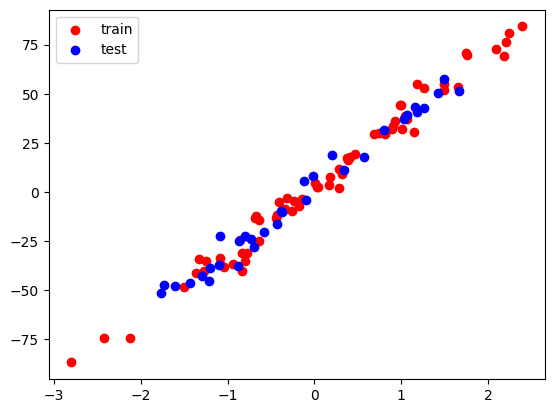

In [10]:
plt.scatter(X_train, y_train, color = 'red', label='train')
plt.scatter(X_test, y_test, color = 'blue', label='test')
plt.legend()
plt.show()

In [11]:
def linear_regression(x, w0, w1):
    return w1*x + w0

def mse(y, y_hat):
    return np.mean((y - y_hat)**2)

In [36]:
w0, w1 = np.random.randn(), np.random.randn()
lr = 0.1
n_epochs = 20
loss = []
for epoch in range(n_epochs):
    # predictions
    y_hat = linear_regression(X_train, w0, w1)
    
    # loss
    e = mse(y_train, y_hat)
    loss.append(e)
    # gradients
    grad_w0 = 2 * np.mean(y_hat - y_train)
    grad_w1 = 2 * np.mean(X_train * (y_hat - y_train))
    
    # gradient descent
    
    w0 -= lr * grad_w0
    w1 -= lr * grad_w1
    
    print(f"epoch: {epoch} \t loss: {e:.2} \t w0: {w0:.4} \t w1: {w1:.4}")


epoch: 0 	 loss: 1.5e+03 	 w0: 1.301 	 w1: 10.21
epoch: 1 	 loss: 8.2e+02 	 w0: 2.2 	 w1: 16.76
epoch: 2 	 loss: 4.4e+02 	 w0: 2.744 	 w1: 21.5
epoch: 3 	 loss: 2.5e+02 	 w0: 3.053 	 w1: 24.95
epoch: 4 	 loss: 1.4e+02 	 w0: 3.208 	 w1: 27.45
epoch: 5 	 loss: 8.9e+01 	 w0: 3.264 	 w1: 29.26
epoch: 6 	 loss: 6.1e+01 	 w0: 3.261 	 w1: 30.58
epoch: 7 	 loss: 4.5e+01 	 w0: 3.224 	 w1: 31.55
epoch: 8 	 loss: 3.7e+01 	 w0: 3.168 	 w1: 32.25
epoch: 9 	 loss: 3.3e+01 	 w0: 3.104 	 w1: 32.76
epoch: 10 	 loss: 3.1e+01 	 w0: 3.04 	 w1: 33.14
epoch: 11 	 loss: 2.9e+01 	 w0: 2.978 	 w1: 33.41
epoch: 12 	 loss: 2.9e+01 	 w0: 2.921 	 w1: 33.62
epoch: 13 	 loss: 2.8e+01 	 w0: 2.87 	 w1: 33.76
epoch: 14 	 loss: 2.8e+01 	 w0: 2.826 	 w1: 33.87
epoch: 15 	 loss: 2.8e+01 	 w0: 2.787 	 w1: 33.96
epoch: 16 	 loss: 2.8e+01 	 w0: 2.754 	 w1: 34.02
epoch: 17 	 loss: 2.8e+01 	 w0: 2.726 	 w1: 34.06
epoch: 18 	 loss: 2.8e+01 	 w0: 2.702 	 w1: 34.09
epoch: 19 	 loss: 2.8e+01 	 w0: 2.683 	 w1: 34.12


In [30]:
print(f"w0_real: {w0_real}, w1_real: {w1_real}")

w0_real: 2.7, w1_real: 33.86708459143266


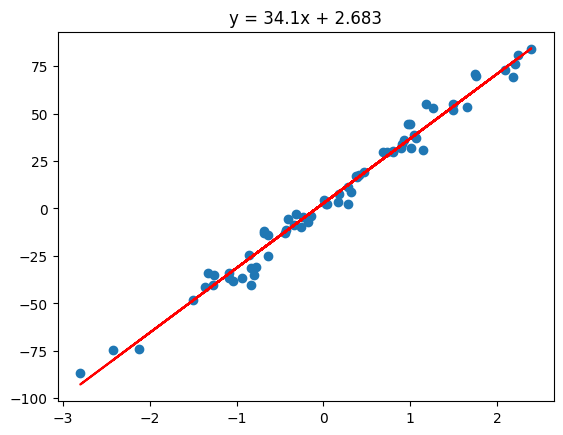

In [40]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_hat, 'r')
plt.title(f"y = {w1:.3}x + {w0:.4}");

In [89]:
np.savetxt("Linear-Regression", np.array([w0, w1]))

In [90]:
w0, w1 = np.loadtxt("Linear-Regression")
print(f"w0: {w0}")
print(f"w1: {w1}")

w0: 2.651940111673889
w1: 33.92123912155274


In [91]:
model_comp = pd.DataFrame()
model_comp = model_comp.append(pd.DataFrame({'w0': w0,
                                             'w1' : w1},
                                            index = ['Custom']), 
                               ignore_index = False)

model_comp

/tmp/ipykernel_2575/562274086.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comp = model_comp.append(pd.DataFrame({'w0': w0,


,w0,w1
Custom,2.65194,33.921239


## Validation

In [51]:
y_pred_test = linear_regression(X_test, w0, w1)
y_pred_test

array([ 51.03839093, -10.25426356, -38.68661997,  14.23466066,
       -34.3572651 ,  -0.54872276, -38.20139024,  22.25985382,
        39.16842356, -12.13673427, -10.65424442,  37.86243682,
        29.80193193,  42.33498824,  53.71139071, -41.46938172,
        -1.61732834, -22.30775915, -24.79513641, -46.06154456,
         2.27894829,  42.86920852, -27.32568331, -26.88910781,
       -21.19602344, -57.75907908, -52.11010364, -17.05826132,
        45.50912535, -56.26252811, -34.75209696,  59.35142742,
         9.49000274])

In [52]:
X_test

array([ 1.41729905, -0.37917643, -1.21252313,  0.33858905, -1.0856306 ,
       -0.09470897, -1.19830114,  0.57380586,  1.06939267, -0.43435128,
       -0.39089979,  1.03111446,  0.79486267,  1.16220405,  1.49564414,
       -1.29408532, -0.12602959, -0.73246199, -0.80536652, -1.4286807 ,
       -0.01183049,  1.17786194, -0.87953634, -0.8667404 , -0.69987723,
       -1.7715331 , -1.60596276, -0.57860025,  1.25523737, -1.72766949,
       -1.09720305,  1.66095249,  0.19952407])

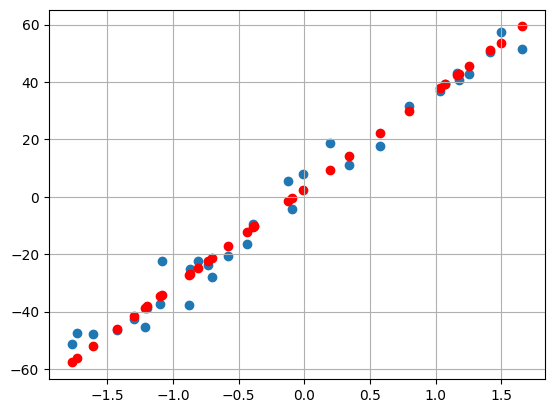

In [56]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred_test, color = 'red')
plt.grid()

In [58]:
def r2(y, y_hat):
    return 1 - np.sum((y - y_hat)**2) / np.sum((y - y.mean())**2)


0.9791657365922132

In [59]:
y_pred_train = linear_regression(X_train, w0, w1)
r2_train = r2(y_train, y_pred_train)
print(f"R2 for Train data is: {r2_train}")

R2 for Train data is: 0.9824954158289385


In [60]:
y_pred_test = linear_regression(X_test, w0, w1)
r2_test = r2(y_test, y_pred_test)
print(f"R2 for Test data is: {r2_test}")

R2 for Test data is: 0.9791657365922132


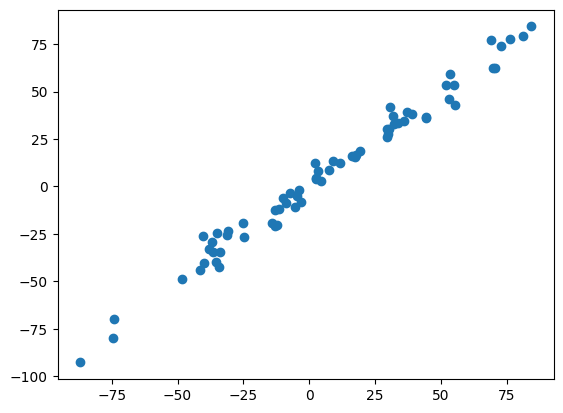

In [62]:
plt.scatter(y_train, y_pred_train);

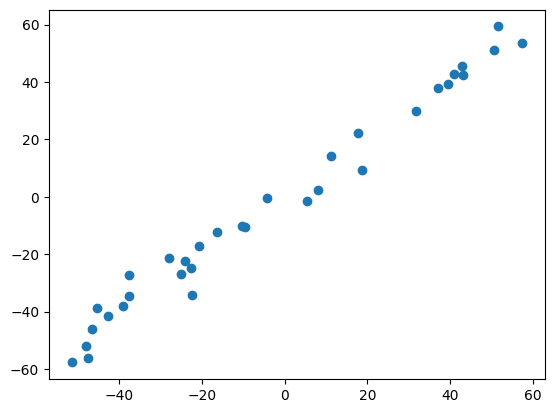

In [63]:
plt.scatter(y_test, y_pred_test)

## train with sklearn 

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
bias = 2.7
x_train, y_train, coef = datasets.make_regression(n_samples=100, 
                                 n_features=1, 
                                 n_informative=2, 
                                 n_targets=1, 
                                 bias=bias, 
                                 effective_rank=None, 
                                 tail_strength=0.5, 
                                 noise=5.5, 
                                 shuffle=True, 
                                 coef=True, 
                                 random_state=123)


print(f"w0_real: {bias}, w1_real: {coef}")

w0_real: 2.7, w1_real: 33.86708459143266


In [ ]:
x_train.shape

(100, 1)

In [ ]:
y_train.shape

(100,)

In [ ]:
model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([33.92123912])

In [ ]:
model.intercept_


2.6519401116738885

In [104]:
model_comp = model_comp.append(pd.DataFrame({'w0': model.intercept_,
                                             'w1' : model.coef_},
                                            index = ['sklearn']), 
                               ignore_index = False)

model_comp

/tmp/ipykernel_2575/3473405800.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comp = model_comp.append(pd.DataFrame({'w0': model.intercept_,


,w0,w1
Custom,2.65194,33.921239
sklearn,2.65194,33.921239


In [105]:
model.score(x_train, y_train)

0.9819502482138802

## stats library

In [107]:
import statsmodels.api as sm

In [109]:
x_train = sm.add_constant(x_train)

In [111]:
model = sm.OLS(y_train, x_train)

In [112]:
results = model.fit()

In [114]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     5331.
Date:                Fri, 20 Jan 2023   Prob (F-statistic):           2.99e-87
Time:                        21:17:23   Log-Likelihood:                -306.54
No. Observations:                 100   AIC:                             617.1
Df Residuals:                      98   BIC:                             622.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6519      0.524      5.058      0.0

In [116]:
results.params

array([ 2.65194011, 33.92123912])

In [119]:
model_comp = model_comp.append(pd.DataFrame({'w0': results.params[0],
                                             'w1' : results.params[1]},
                                            index = ['stats']), 
                               ignore_index = False)

model_comp

/tmp/ipykernel_2575/373848473.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comp = model_comp.append(pd.DataFrame({'w0': results.params[0],


,w0,w1
Custom,2.65194,33.921239
sklearn,2.65194,33.921239
stats,2.65194,33.921239
